## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [2]:
path = r"/Users/katalysenko/Documents/Instacart Basket Analysis"

In [3]:
ords_prods_customer_merged = pd.read_pickle(r"/Users/katalysenko/Documents/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl")

In [4]:
ords_prods_customer_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Create a histogram of the “order_hour_of_day” column

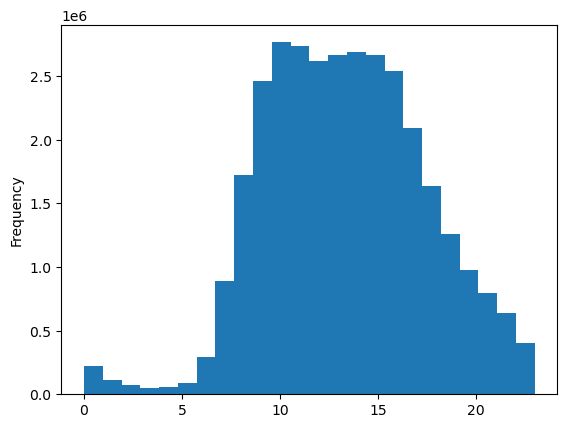

In [6]:
hist_order_hour_of_day = ords_prods_customer_merged['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows us the peak and off-peak hours of orders. The histogram shows that the most active hours are between 9:00 and 16:00, with a clear peak during this period. In contrast, the hours between 1:00 and 6:00 are the lowest in terms of order activity. In addition, there is a gradual decline in the number of orders after 16:00.

## Create a bar chart from the “loyalty_flag” column

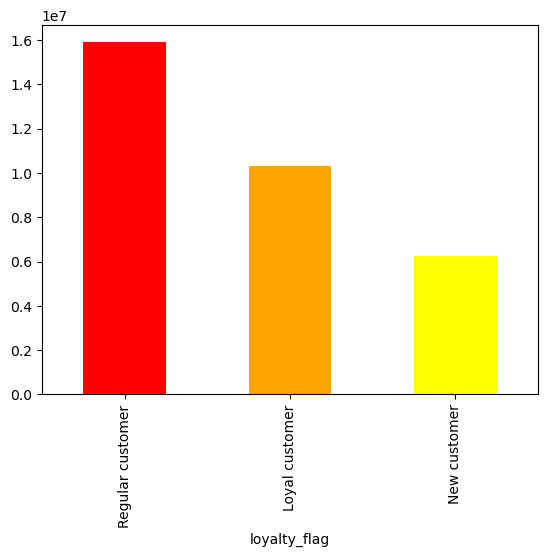

In [9]:
bar_loyalty_flag = ords_prods_customer_merged['loyalty_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow'])

## Create a Line chart with Sample data

In [10]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_customer_merged)) <= 0.7

In [11]:
dev

array([False,  True, False, ..., False,  True,  True])

In [12]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [13]:
# Store 70%  of the sample in the df

big = ords_prods_customer_merged[dev]

In [14]:
# Store 30% of the sample in the data

small = ords_prods_customer_merged[~dev]

In [17]:
len(ords_prods_customer_merged)

32434212

In [18]:
len(big) + len(small)

32434212

In [19]:
# Working with the samples of merged df

merged_small = small[['order_hour_of_day', 'prices']]

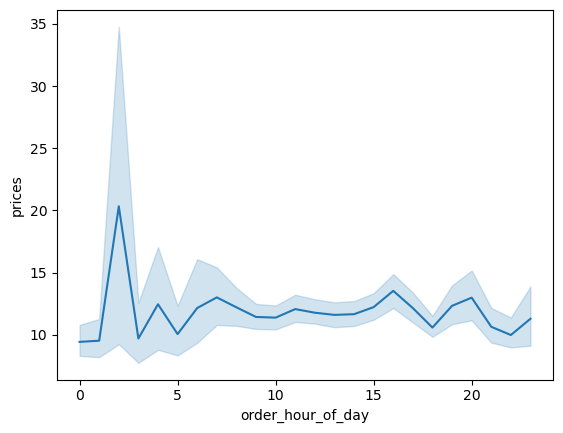

In [20]:
# Creating the Line Chart
line_hour_of_day = sns.lineplot(data = merged_small, x = 'order_hour_of_day', y = 'prices')

In [21]:
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

## Creating a line chart exploring the connections between age and number of dependents

In [22]:
merged_small_2 = small[['age', 'num_of_dependants']]

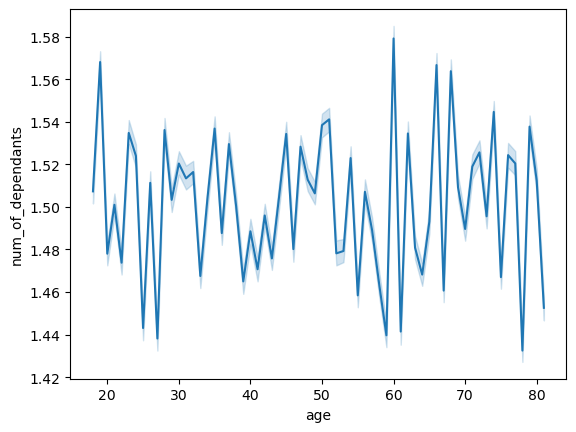

In [27]:
line_age_num_of_dependents = sns.lineplot(data = merged_small_2, x = 'age', y = 'num_of_dependants')

In this line chart, we cannot see a correlation between age and number of dependents.

In [28]:
line_age_num_of_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_num_of_dependents.png'))

## Connection between age and spending power (income)

In [29]:
merged_small_3 = small[['age', 'income']]

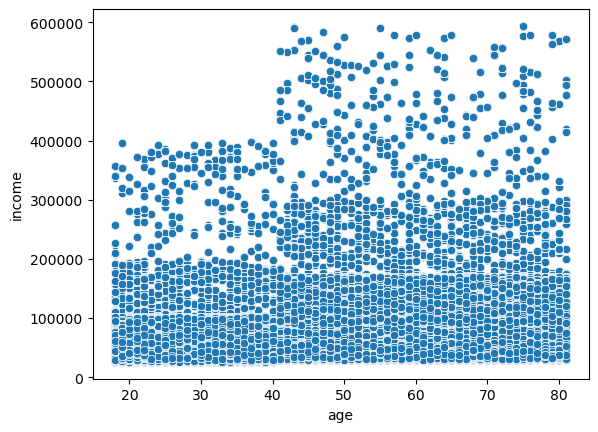

In [30]:
scatterplot_age_income = sns.scatterplot( x = 'age', y = 'income', data = merged_small_3)

The scatterplot shows a marked correlation between these two variables, as well as a predominant concentration of individuals with incomes below 200,000. However, in the older age group of 40 and over, there is a noticeable presence of individuals with significantly higher incomes compared to the 20 to 39 age range. This observation suggests that as people cross the age threshold of 40, their earning potential tends to increase.

In [31]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))